# Multi-Layer-Perceptron:

**Short Summary: Multi-Layer-Percepton**

MLPs are a type of feedforward Neural Network which has at least one input, one hidden and one output layer of neurons. Every neuron has inputs from every node in the previous layer and provides output to the next layer. For every connection of neurons a weight determines the importance and direction (positive or negative) of this neuron connection. Then every neuron (except input) uses an *activation function* to calculate the nodes output from the weighted combination of all of its inputs. The most common activation functions are the Sigmoid Function (y(x) = 1 / 1 + exp(-x)) and rectified linear unit (ReLU) which simply converts all negative inputs to 0.
<br>Learning occurs in the perceptron by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result. This is an example of supervised learning, and is carried out through *backpropagation*, a generalization of the least mean squares algorithm in the linear perceptron.

<mark>Source: my uni course and https://en.wikipedia.org/wiki/Multilayer_perceptron </mark>

## Classifying Breast Cancer 

Regarding MLPs I couldnt find the data we used in our uni course, so instead I decided to use this classic dataset about classifying breast cancer as malignent or  benign from https://goo.gl/U2Uwz2 .  

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame = True)
target = data.target
features = data.data
comp = load_breast_cancer(as_frame = True).frame
features.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


Switching around the binary encoding for the target variable so "malignent" is 1:

In [2]:
target.loc[target == 0] = 2
target.loc[target == 1] = 0
target.loc[target == 2] = 1
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int32

The **features** are ten different characteristics of cell nuclei in a digitized images of breast mass. For every characteristic there's in total three features containing the "mean", "standard error" and "worst".<br>
* radius (mean of distances from center to points on the perimeter)

* texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

* **target: 1 = "benign"; 0 = "malignent"**

### Exploring some of the features:

**Mean Radius:**

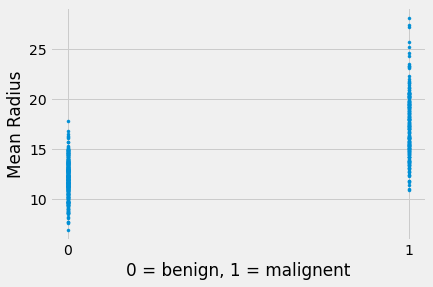

In [3]:
import matplotlib.pyplot as plt
with plt.style.context("fivethirtyeight"):
    plt.scatter(target, features["mean radius"], s = 3** 2)
    plt.xticks([0, 1])
    plt.ylabel("Mean Radius")
    plt.xlabel("0 = benign, 1 = malignent")

Despite an overlap between the classes, there's a clear trend that a bigger mean radius has a higher probability of beign malignent: all cell nuclei with mean radius bigger than ~20 are classified as malignent.

**Comparing the average Worst Area for both classes:**

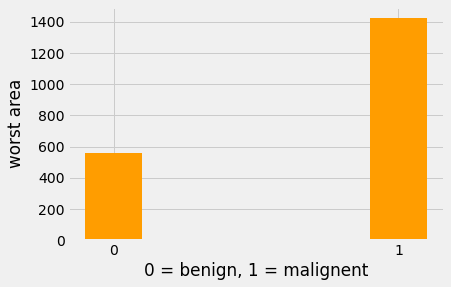

In [4]:
mal = comp.loc[comp.target == 0]
ben = comp.loc[comp.target == 1]
col = "worst area"
with plt.style.context("fivethirtyeight"):
    plt.bar(x = np.arange(2), height = [np.mean(ben[col]), np.mean(mal[col])], width = 0.2, color = ["#ff9d00", "#ff9d00"])
    plt.xticks([0, 1])
    plt.ylabel(col)
    plt.xlabel("0 = benign, 1 = malignent")

Malignent cells seem to have higher values on average for worst area.

**Split and Standardize Data:**

MLPs are sensitive to feature scaling so it's recommended to scale all features; here using sklearns StandardScaler()

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=1)
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

### Model:

**Creating a MLP with two hidden layers with 5 neurons in each of them**

In [6]:
clf = MLPClassifier(hidden_layer_sizes = (5, 5), max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Evaluating Classification Performance:**

Accuaracy:

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.965034965034965

Looking at ROC Curve:

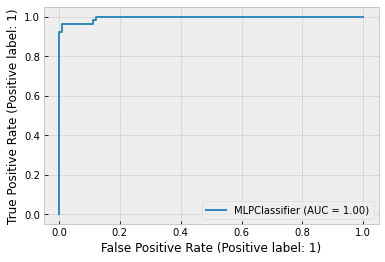

In [8]:
from sklearn.metrics import plot_roc_curve
with plt.style.context("bmh"):
    plot_roc_curve(clf, X_test, y_test)

* *In the ROC-curve the optimal point is in the top left corner where all positives have been correctly identified as positive.*

**Looking at the confusion matrix:**

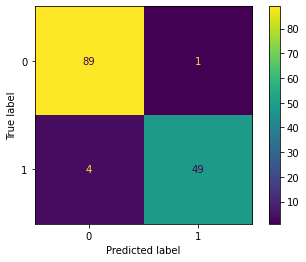

In [9]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)

* Sensivitiy (True Positive rate) measures the proportion of positives that are correctly identified; here: 49 / 53
* Specificity (True Negative rate) measures the proportion of negatives that are correctly identified; here: 89 / 90
* Accuracy: proportion of all correctly identified; here: 138 / 143

In a machine learning context sensitivity is commonly referred to as **recall**.

In [12]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred) == 49 / 53

True

**precision** is the proportion of correctly identified positives of all positives(PPV); here: 49 / 50

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred) == 49 / 50

True